In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

RANDOM_SEED = 20090425

# Golden State Warriors Team rankings

A general goal of many statistical data analysis tasks is to relate the influence of one variable on another. Let's suppose three factors count in a game of basketball: FG ,TOV and AST based on the points for each player.

FG - Field Goal Attempts -A field goal made is credited to a player when an attempt is successful or when an official awards points for defensive basket interference or goal tending.A made field goal is credited when a player tips the ball into the basket.

TOV - Turnovers - A turnover is credited to an offensive player whose actions are directly responsible for losing ball possession to the opposing team prior to shooting. When a team has gained control of the ball or having become entitled to the ball does not put the ball in flight for a try at a field goal before an opponent gains control of the ball - then a turnover situation exists.A team turnover is credited when a team is in or entitled to possession of the ball, and a technical is called on the coach or the bench.

AST - Assists - an assist is attributed to a player who passes the ball to a teammate in a way that leads to a score by field goal, meaning that he or she was "assisting" in the basket.

We observe and collect data for 15 players in the team.The player with more points as well as better FG ,AST,TOV are ranked better in the team. We have taken only 3 stats agaisnt the points for a player in GSW team.

## Reading the Dataset for GSW
We are going to use the pandas library and invoke its read.csv() function in our file. This function returns an object of the DataFrame class. Using the head method to obtain first five entries of the dataset

In [77]:
gsw = pd.read_excel('GSW_stats.xlsx')

In [78]:
gsw.head()

,Player,G,GS,MP,FG,FGA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Kevin Durant,57,57,2017,554,1074,360,403,30,368,398,336,45,62,176,111,1573
1,Klay Thompson,56,56,1910,478,1019,102,126,24,199,223,123,63,38,86,120,1224
2,Stephen Curry,46,46,1576,440,901,200,217,32,204,236,240,56,18,128,118,1316
3,Draymond Green,42,42,1308,115,271,42,58,41,277,318,307,66,45,108,135,296
4,Kevon Looney,57,23,1184,161,264,54,86,148,186,334,102,34,47,38,160,377


In [79]:
# Create the features and response
X = gsw.loc[:, ['FG','AST','TOV']]
y = gsw.loc[:, 'PTS']

In [80]:
X

,FG,AST,TOV
0,554,336,176
1,478,123,86
2,440,240,128
3,115,307,108
4,161,102,38
5,113,164,37
6,130,80,35
7,134,82,32
8,81,85,26
9,96,19,22


### All of the below graphs show that the stats increase with points , so a better AST,TOV & FG increases the points for the player in the team and hence the ranking of the player

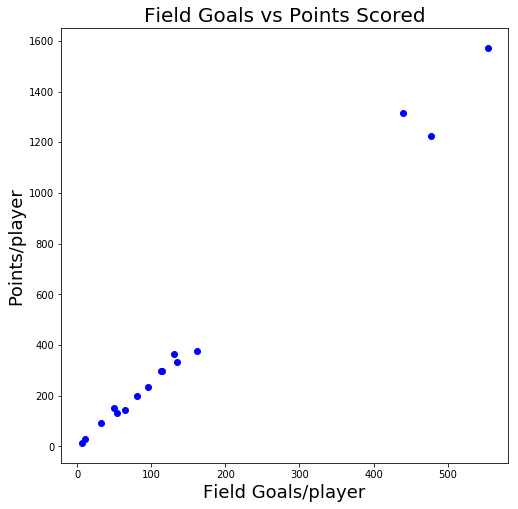

In [81]:
plt.figure(figsize=(8, 8))

plt.plot(gsw['FG'], gsw['PTS'], 'bo');
plt.xlabel('Field Goals/player', size = 18); plt.ylabel('Points/player', size = 18); 
plt.title('Field Goals vs Points Scored', size = 20);

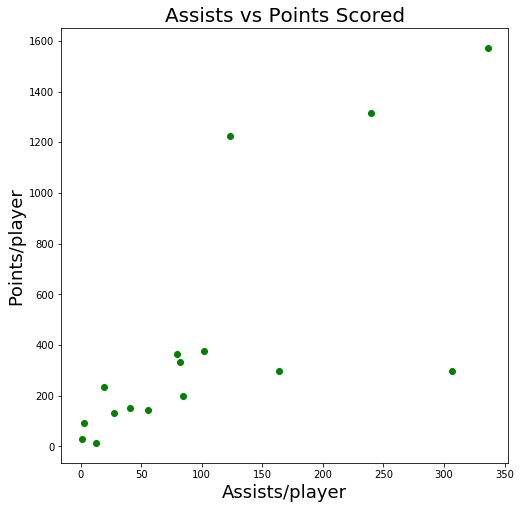

In [8]:
plt.figure(figsize=(8, 8))

plt.plot(gsw['AST'], gsw['PTS'], 'go');
plt.xlabel('Assists/player', size = 18); plt.ylabel('Points/player', size = 18); 
plt.title('Assists vs Points Scored', size = 20);

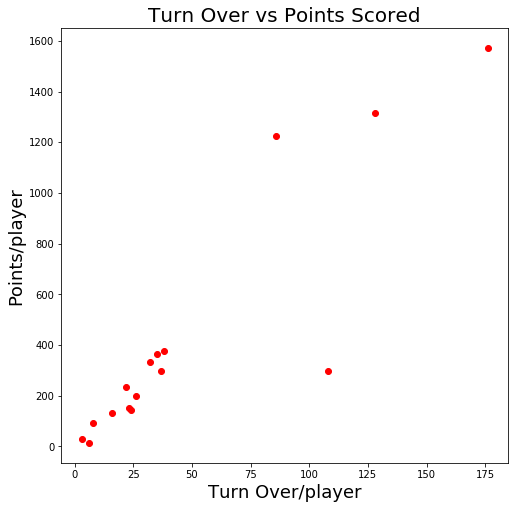

In [638]:
plt.figure(figsize=(8, 8))

plt.plot(gsw['TOV'], gsw['PTS'], 'ro');
plt.xlabel('Turn Over/player', size = 18); plt.ylabel('Points/player', size = 18); 
plt.title('Turn Over vs Points Scored', size = 20);

### Linear sum of squares

Let's look at the general linear effect of FG,AST,TOV on the Points. Let's build a linear predictive model (a line).

We would like to select $\beta_0, \beta_1$ so that the difference between the predictions and the observations is zero, but this is not usually possible, as with our Vandermonde exercise in our linear algenra introduction notebook. Instead, we choose a reasonable criterion: ***the smallest sum of the squared differences between modelled $\hat{y}$ and observed $y$***.

<div style="font-size: 120%;">  
$$R^2 = \sum_i (y_i - [\beta_0 + \beta_1 x_i])^2 = \sum_i \epsilon_i^2 $$  
</div>

Squaring serves two purposes: 

1. to prevent positive and negative values from cancelling each other out
2. to strongly penalize large deviations. 

In other words, we will select the parameters that minimize the squared error of the model. Let's write the cost function:

In [9]:
sum_of_squares = lambda θ, x, y: np.sum((y - θ[0] - θ[1]*x) ** 2)

In [10]:
from scipy.optimize import fmin

e, f, g= X.T.values
e, f, g

(array([554, 478, 440, 115, 161, 113, 130, 134,  81,  96,  64,  53,  50,
         32,   6,  10], dtype=int64),
 array([336, 123, 240, 307, 102, 164,  80,  82,  85,  19,  56,  28,  41,
          3,  13,   1], dtype=int64),
 array([176,  86, 128, 108,  38,  37,  35,  32,  26,  22,  24,  16,  23,
          8,   6,   3], dtype=int64))

In [11]:
h = y.T.values
h

array([1573, 1224, 1316,  296,  377,  299,  364,  333,  197,  236,  142,
        130,  153,   91,   13,   28], dtype=int64)

In [12]:
a0, a1 = fmin(sum_of_squares, [0,1], args=(e,h))
a0, a1

Optimization terminated successfully.
         Current function value: 27840.224996
         Iterations: 99
         Function evaluations: 185


(-19.68252193948864, 2.8156220897578006)

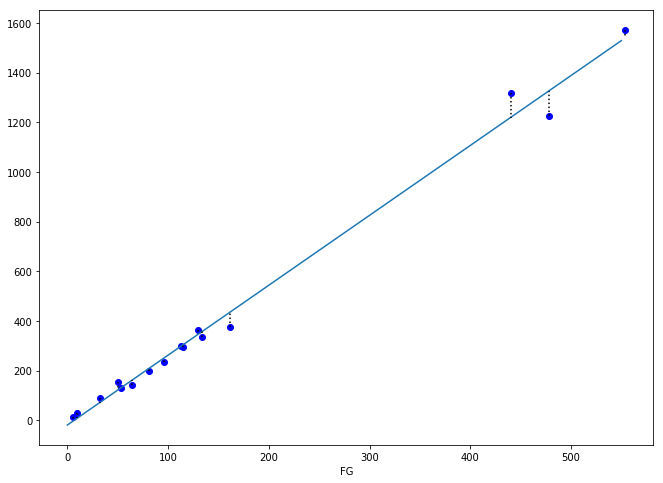

In [15]:
# FG with points 
ax = gsw.plot(x='FG', y='PTS', style='bo', legend=False,figsize=(11,8))
ax.plot([0,550], [a0, a0+a1*550])
for ei, hi in zip(e,h):
    ax.plot([ei]*2, [hi, a0+a1*ei], 'k:')

In [16]:
b0, b1 = fmin(sum_of_squares, [0,1], args=(f,h))
b0, b1

Optimization terminated successfully.
         Current function value: 1701927.909030
         Iterations: 110
         Function evaluations: 202


(72.83239511932383, 3.337310764771746)

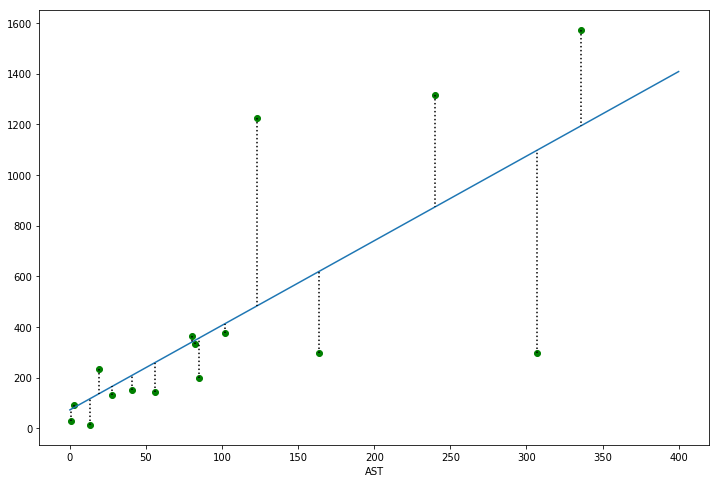

In [17]:
#AST with points
ax = gsw.plot(x='AST', y='PTS', style='go', legend=False,figsize=(12,8))
ax.plot([0,400], [b0, b0+b1*400])
for fi, hi in zip(f,h):
    ax.plot([fi]*2, [hi, b0+b1*fi], 'k:')

In [18]:
c0, c1 = fmin(sum_of_squares, [0,1], args=(g,h))
c0, c1

Optimization terminated successfully.
         Current function value: 703456.937715
         Iterations: 84
         Function evaluations: 158


(2.5438359145460434, 8.764711601052419)

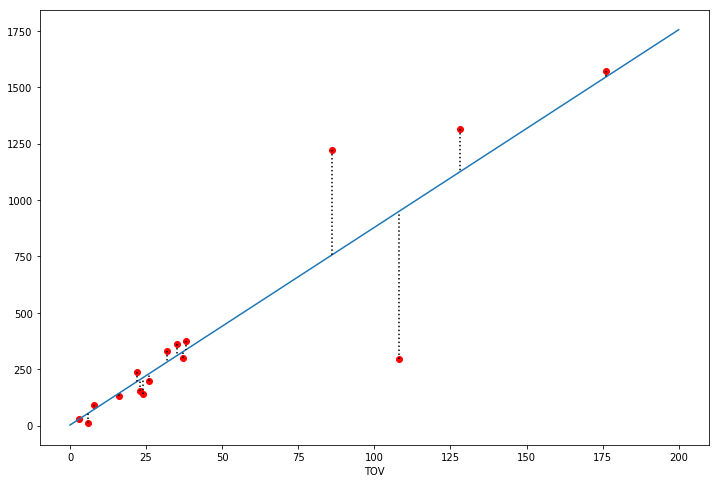

In [19]:
#TOV with points
ax = gsw.plot(x='TOV', y='PTS', style='ro', legend=False,figsize=(12,8))
ax.plot([0,200], [c0, c0+c1*200])
for gi, hi in zip(g,h):
    ax.plot([gi]*2, [hi, c0+c1*gi], 'k:')

#### The stats above more or less coincide with the linear predictive model and we can see that the points of the player do depend on the FG,AST,TOV

## Bayesian Linear Regression with PyMC3

Let's turn to a Bayesian approach and build a regression model in PyMC3 for the games we just recorded.

### Likelihood

We'll pick a **normal** distribution of Points as our model, with a **mean** and **standard deviation** as parameters:

$$y_i \sim \text{Normal}(\mu_i, \sigma)$$

Here, $\mu_i$ is the expected value of the *i*th observation, which is generated by the regression model at the corresponding value of $x$. We calculate this expected value as a function of the regression parameters and the data.

We score *observed* team strength with a single scalar value: ***Points***. However, the important parameters that will help the coach devise a winning strategy are *latent* (hidden). 

Let's assume one latent parameter $\theta$ as the following linear combination of:
- a constant (the bias)
- the FG of players
- the AST of players
- the TOV of players

So we write:

$$log(\theta) = \text{intercept} + \text{slope1} * \text{FG} + \text{slope2} * \text{AST} + \text{slope3} * \text{TOV}$$

We'll incorporate that latent parameter as the mean of the normal distribution model for ***Points***.

### Priors
The first step in specifying our model is to specify priors for our model.

Recall we use a linear model for μ, with an `intercept` (bias) factor and two linear factors `slope1`, `slope2` and `slope3` to represent FG,AST and TOV:

$$μ = \text{intercept} + \text{slope1}*e + \text{slope2}*f +\text{slope1}*g $$
    
We are going to model these factors as Poisson distributions with a *wide* support: 

and finally the standard deviation of our modelled ***Points*** will be a **half Cauchy**:

$$\sigma \sim \text{HalfCauchy}(1)$$

The half-Cauchy distribution (half of a [Cauchy](https://en.wikipedia.org/wiki/Cauchy_distribution)) has support over positive continuous values, and relatively large tail probabilities, allowing for the possibility of extreme values. It is a very often used modeling pdf.

Since we want to track `slope1`,`slope2` and `slope3`, we need to add them as deterministic variables of our model: `pm.Deterministic`.

Ok, let's get cooking. We use `Deterministic` to track computed quantities inside the model.

In [20]:
#Model parameters (priors) as probability density functions
from pymc3 import Normal, HalfCauchy, Deterministic, Model,Gamma,Poisson

with Model() as player_model:
    
    intercept = Normal('intercept',-0.5, sd=100)
    slope1 = Poisson('slope1',42)
    slope2 = Poisson('slope2',42)
    slope3 = Poisson('slope3',42)
    FG = Deterministic('FG', slope1)
    AST = Deterministic('AST', slope2)
    TOV = Deterministic('TOV',slope3)
    σ = HalfCauchy('σ', 1)

WARNING (theano.gof.compilelock): Overriding existing lock by dead process '2708' (I am process '8504')


In [811]:
with player_model:
    
    μ = intercept + slope1*FG + slope2*AST + slope3*TOV
    mu_d = Deterministic('mu_d', μ)
    score = Normal('score', mu=μ, sd=σ, observed=y)

All right! Now the regression model is fully specified and ready to track your posteriors.

We now use the fitting method of your choice to estimate a posterior distribution. Let's use a **Markov chain Monte Carlo** algorithm, called **NUTS** (the No U-Turn Sampler).

In [812]:
#probabilistic program that yields the best values for parameters
from pymc3 import sample

with player_model:

    player_sample = sample(1000, random_seed=RANDOM_SEED)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [σ, intercept]
>CompoundStep
>>Metropolis: [slope3]
>>Metropolis: [slope2]
>>Metropolis: [slope1]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:02<00:00, 2066.79draws/s]
The acceptance probability does not match the target. It is 0.9066037711565866, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9182103934818491, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.9039027432898643, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.


Let's plot posteriors anyway:

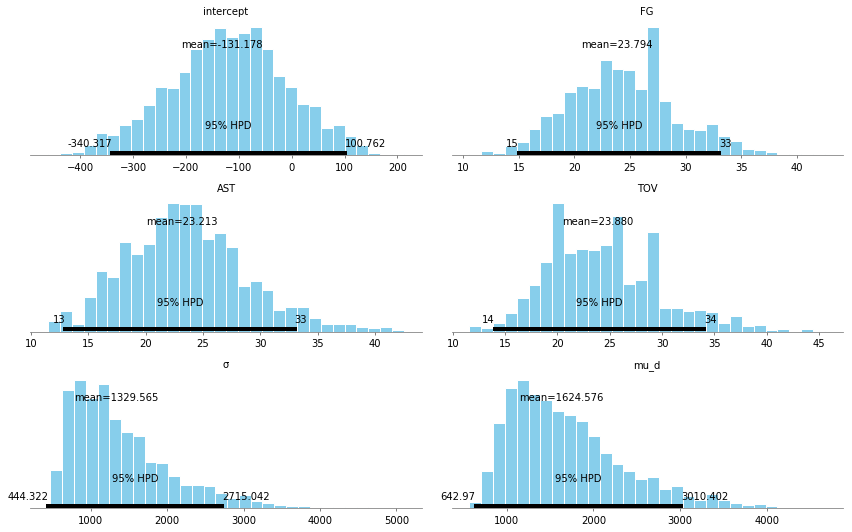

In [813]:
#Run a probabilistic program to give us the posterior pdfs
from pymc3 import plot_posterior

plot_posterior(player_sample[500:], varnames=['intercept', 'FG', 'AST','TOV', 'σ', 'mu_d']);

# Checking model fit

One intuitive way of evaluating model fit is to compare model predictions with the observations used to fit the model. In other words, the fitted model can be used to **simulate
data**, and the distribution of the simulated data should resemble the distribution of the actual data.

Sampling from the **posterior predictive distribution** is straighforward in PyMC3. The `sample_posterior_predictive` function draws posterior predictive checks from all of the data likelihoods. 

In [814]:
from pymc3 import sample_posterior_predictive

with player_model:
    
    player_ppc = sample_posterior_predictive(player_sample, 1000)

100%|██████████| 1000/1000 [00:00<00:00, 1895.23it/s]


In [815]:
player_ppc['score'].shape

(1000, 16)

We can then compare these simulated data to the data we used to fit the model. 

The model should prove that ***it*** could have been used to generate the player data that we observed.

We plot 15 histograms `hist`, one for each of the 1000 simulations per plater. Since each simulation yields different points per player, it makes sense that all these simulations put together yeild a histogram. We know see if the mean points per player for all 1000 simulations matches the real score of each game, represented by a red line. 

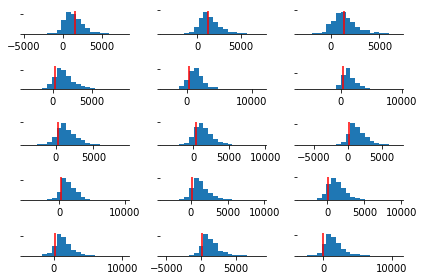

In [816]:
#Plot the posterior means and check if we get a good match
fig, axes = plt.subplots(5,3)
axes_flat = axes.flatten()

for ax, real_data, sim_data in zip(axes_flat[:], y, player_ppc['score'].T):
    ax.hist(sim_data, bins=20)
    ax.vlines(real_data, *ax.get_ylim(), colors='red')
    ax.set_yticklabels([])
    sns.despine(left=True)

#axes_flat[-1].axis('off')
plt.tight_layout()

The [highest posterior density interval](highest posterior density interval) (HDI) is the shortest interval on a posterior density for some given confidence level. HDI has the nice property that any point **within** the interval has a higher density than any other point outside. Thus, the HPD interval is **the** collection of most likely values of a parameter.



In [724]:
import pymc3 as pm
pm.stats.hpd(player_sample['FG'])

array([14, 34])

In [725]:
pm.stats.hpd(game_sample['AST'])

array([28, 53])

In [726]:
pm.stats.hpd(game_sample['TOV'])

array([29, 53])

## Using Scikit learn to perform Linear regression


In [4]:
# Importing the dataset
dataset = pd.read_excel('GSW_stats.xlsx')
dataset

,Player,G,GS,MP,FG,FGA,FT,FTA,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Kevin Durant,57,57,2017,554,1074,360,403,30,368,398,336,45,62,176,111,1573
1,Klay Thompson,56,56,1910,478,1019,102,126,24,199,223,123,63,38,86,120,1224
2,Stephen Curry,46,46,1576,440,901,200,217,32,204,236,240,56,18,128,118,1316
3,Draymond Green,42,42,1308,115,271,42,58,41,277,318,307,66,45,108,135,296
4,Kevon Looney,57,23,1184,161,264,54,86,148,186,334,102,34,47,38,160,377
5,Andre Iguodala,50,11,1176,113,226,33,53,35,159,194,164,44,39,37,65,299
6,Jonas Jerebko,53,6,972,130,274,51,62,62,184,246,80,17,10,35,108,364
7,Quinn Cook,49,8,705,134,300,15,20,16,93,109,82,17,3,32,66,333
8,Shaun Livingston,45,0,690,81,165,35,43,31,58,89,85,24,23,26,55,197
9,Alfonzo McKinnie,48,1,678,96,196,16,31,61,108,169,19,10,10,22,92,236


In [43]:
# Create the features and response
X = dataset.loc[:, ['FG']]
y = dataset.loc[:, 'PTS']

In the below  regression model, we want to test how  FG (Field Goals) affect the Points of a player.
Hence the  independant variable (x) will be FG and my dependant variable (y) is PTS

In [52]:
#Creating the independent variable 
X

array([[554],
       [478],
       [440],
       [115],
       [161],
       [113],
       [130],
       [134],
       [ 81],
       [ 96],
       [ 64],
       [ 53],
       [ 50],
       [ 32],
       [  6],
       [ 10]], dtype=int64)

In [53]:
#Creating the dependent variable
y

0     1573
1     1224
2     1316
3      296
4      377
5      299
6      364
7      333
8      197
9      236
10     142
11     130
12     153
13      91
14      13
15      28
Name: PTS, dtype: int64

Let's visualize these two columns and see whether a linear regression is viable

Below is scatter plot of Fiels goals and points of each player

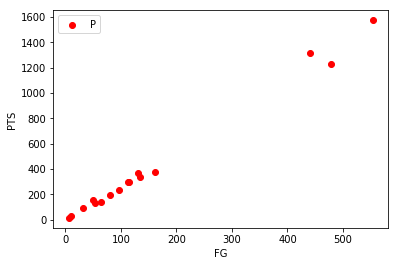

In [57]:
plt.scatter(X, y, c='red', label='Scatter Plot') #implementing the scatter function from pyplot
plt.xlabel('FG') 
plt.ylabel('PTS') 
plt.legend('PTS')
plt.show()

Doesn't look too bad, as Field goals increases, so does the number of points

Also Points does not dropped significantly after going up, so a linear estimation is viable


In [59]:
# LET'S MAKE THE MODEL! 
X = X.reshape(len(X),1)
# Creating regression model using sklearn
reg = LinearRegression()

# Fitting it to X and Y that we defined prevoiusly
reg = reg.fit(X, y)

# getting our Y Pred using reg.Predict
Y_pred = reg.predict(X) #Predicted values based on linear model object

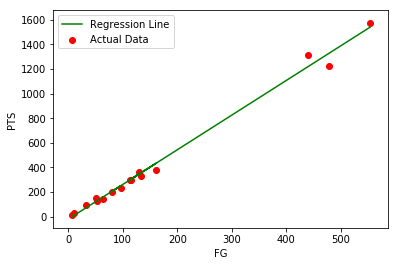

In [60]:
# let's visuzlize our results
plt.plot(X, Y_pred, color='green', label='Regression Line')
plt.scatter(X, y, c='red', label='Actual Data')

plt.xlabel('FG')
plt.ylabel('PTS')
plt.legend()
plt.show()

In [50]:
y

0     1573
1     1224
2     1316
3      296
4      377
5      299
6      364
7      333
8      197
9      236
10     142
11     130
12     153
13      91
14      13
15      28
Name: PTS, dtype: int64

The real values are the observations points in red.The predictive values are ones on the green regression line.

In [51]:
Y_pred #predicted points values based of Field Goals

array([1540.1720997 , 1326.18481859, 1219.19117803,  304.11398905,
        433.63260657,  298.48274481,  346.34832085,  357.61080933,
        208.38283697,  250.61716877,  160.51726093,  129.54541761,
        121.09855125,   70.4173531 ,   -2.78882202,    8.47366646])

From the above plot, it is clear that there is a linear dependency between FG and PTS

Let's try plotting this for Assists and Points

In [29]:
# Create the features and response
X = dataset.loc[:, ['AST']]
y = dataset.loc[:, 'PTS']

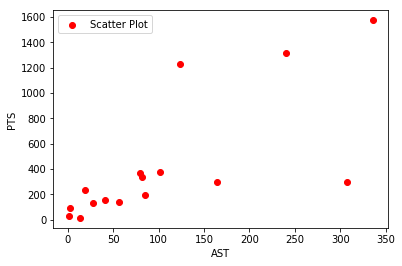

In [35]:
plt.scatter(X, y, c='red', label='Scatter Plot')
plt.xlabel('AST')
plt.ylabel('PTS')
plt.legend()
plt.show()

In [33]:
# LET'S MAKE THE MODEL! 
X = X.values.reshape(len(X),1)
# Creating regression model using sklearn
reg = LinearRegression()

# Fitting it to X and Y that we defined prevoiusly
reg = reg.fit(X, y)

# getting our Y Pred
Y_pred = reg.predict(X) #Predicted values based on linear model object

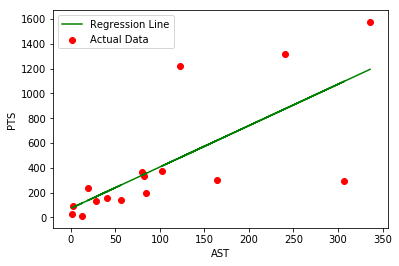

In [36]:
# let's visuzlize our results
plt.plot(X, Y_pred, color='green', label='Regression Line')
plt.scatter(X, y, c='red', label='Actual Data')

plt.xlabel('AST')
plt.ylabel('PTS')
plt.legend()
plt.show()

In [38]:
y

0     1573
1     1224
2     1316
3      296
4      377
5      299
6      364
7      333
8      197
9      236
10     142
11     130
12     153
13      91
14      13
15      28
Name: PTS, dtype: int64

In [40]:
#predicted points values based on Assists
Y_pred

array([1194.16885881,  483.32159939,  873.78699541, 1097.38683757,
        413.23806677,  620.15135355,  339.81722307,  346.49184523,
        356.50377846,  136.24124737,  259.72175722,  166.27704706,
        209.66209107,   82.84427014,  116.21738091,   76.16964798])

In the above case, the prediction is slightly in appropriate and this proves that there is no clear linear dependency between Assits and points of a player

In [61]:
# Create the features and response
X = dataset.loc[:, ['TOV']]
y = dataset.loc[:, 'PTS']

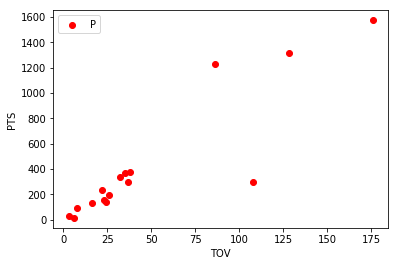

In [62]:
plt.scatter(X, y, c='red', label='Scatter Plot') #implementing the scatter function from pyplot
plt.xlabel('TOV') 
plt.ylabel('PTS') 
plt.legend('PTS')
plt.show()

In [63]:
# LET'S MAKE THE MODEL! 
X = X.values.reshape(len(X),1)
# Creating regression model using sklearn
reg = LinearRegression()

# Fitting it to X and Y that we defined prevoiusly
reg = reg.fit(X, y)

# getting our Y Pred
Y_pred = reg.predict(X) #Predicted values based on linear model object

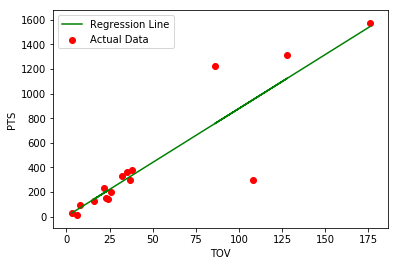

In [65]:
# let's visuzlize our results
plt.plot(X, Y_pred, color='green', label='Regression Line')
plt.scatter(X, y, c='red', label='Actual Data')

plt.xlabel('TOV')
plt.ylabel('PTS')
plt.legend()
plt.show()

In [66]:
y

0     1573
1     1224
2     1316
3      296
4      377
5      299
6      364
7      333
8      197
9      236
10     142
11     130
12     153
13      91
14      13
15      28
Name: PTS, dtype: int64

In [67]:
Y_pred #predictions of TOV based on PTS

array([1545.13316151,  756.30906357, 1124.42697595,  949.13273196,
        335.60287801,  326.83816581,  309.30874141,  283.01460481,
        230.42633162,  195.36748282,  212.89690722,  142.77920962,
        204.13219502,   72.66151203,   55.13208763,   28.83795103])

The dependency between TOV and Points is better when compared to prediction between Assists and points as the regression line coincides with most of the real PTS values